In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [7]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc


In [13]:
import pandas as pd

# Load data
train_df = pd.read_csv("C:/Users/uggev/Downloads/archive (1)/fraudTrain.csv")
test_df = pd.read_csv("C:/Users/uggev/Downloads/archive (1)/fraudTest.csv")

# Inspect data
print(train_df.head())
print(train_df.info())
print(train_df.isnull().sum())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

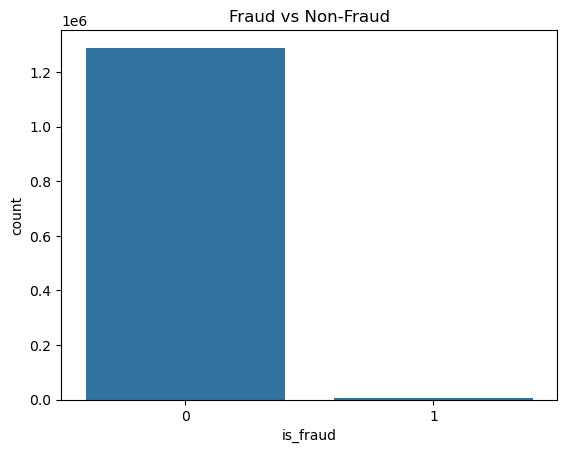

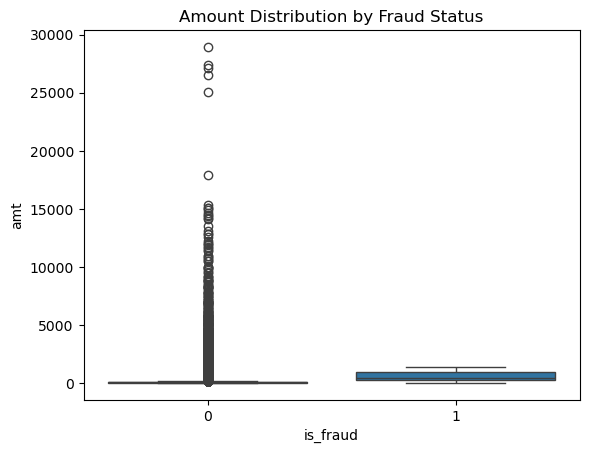

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraud vs Non-Fraud
sns.countplot(data=train_df, x='is_fraud')
plt.title("Fraud vs Non-Fraud")
plt.show()

# Transaction Amount by Fraud Status
sns.boxplot(data=train_df, x='is_fraud', y='amt')
plt.title("Amount Distribution by Fraud Status")
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder

def preprocess(df):
    df = df.copy()
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day'] = df['trans_date_trans_time'].dt.dayofweek
    df.drop(['cc_num', 'trans_num', 'unix_time', 'trans_date_trans_time'], axis=1, inplace=True)

    for col in ['merchant', 'category', 'gender', 'state', 'city', 'job']:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
    
    return df

train_df_clean = preprocess(train_df)
test_df_clean = preprocess(test_df)


In [31]:
from sklearn.preprocessing import LabelEncoder

def preprocess(df):
    df = df.copy()

    # Convert date to datetime and extract features
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['hour'] = df['trans_date_trans_time'].dt.hour
    df['day'] = df['trans_date_trans_time'].dt.dayofweek

    # Drop irrelevant columns
    df.drop(['cc_num', 'trans_num', 'unix_time', 'trans_date_trans_time', 'first', 'last', 'street', 'dob'], axis=1, inplace=True)

    # Label encode all categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = LabelEncoder().fit_transform(df[col])

    return df


In [35]:
train_df_clean = preprocess(train_df)
test_df_clean = preprocess(test_df)

X = train_df_clean.drop('is_fraud', axis=1)
y = train_df_clean['is_fraud']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)



Logistic Regression
Accuracy: 0.9937069813176008
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



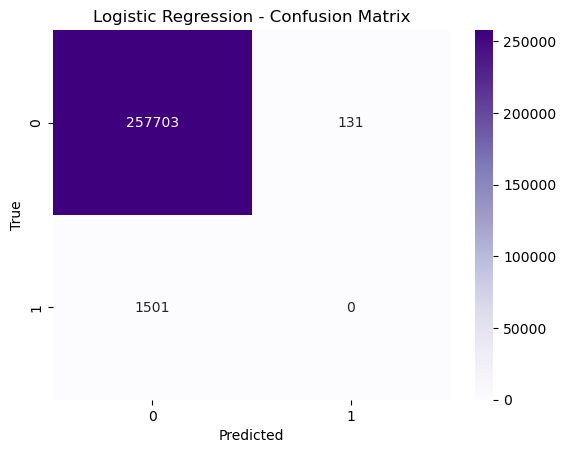


Decision Tree
Accuracy: 0.9968534906588004
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.72      0.75      0.73      1501

    accuracy                           1.00    259335
   macro avg       0.86      0.87      0.87    259335
weighted avg       1.00      1.00      1.00    259335



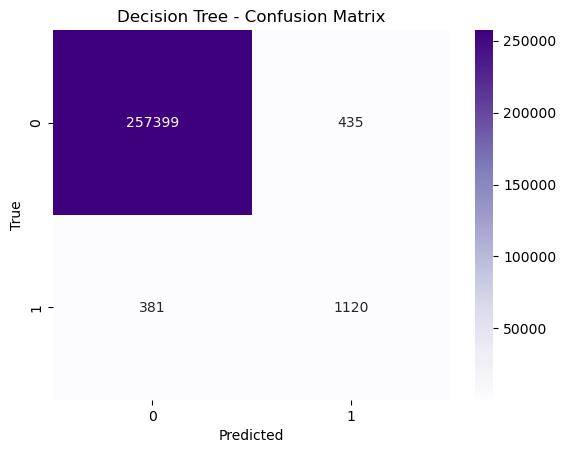

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Step 1: Load your dataset
df = pd.read_csv('C:/Users/uggev/Downloads/archive (1)/fraudTrain.csv')

# Step 2: Drop irrelevant columns
df = df.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num', 'unix_time', 'merchant'], axis=1)

# Step 3: Encode categorical features
df = pd.get_dummies(df)

# Step 4: Split features and target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Step 5: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Step 7: Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Save model, scaler, and columns
joblib.dump(model, 'fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), 'model_columns.pkl')

print("✅ Model, scaler, and column list saved successfully.")


In [ ]:
import joblib
import pandas as pd

# Step 1: Load the saved model, scaler, and column names
model = joblib.load('fraud_model.pkl')
scaler = joblib.load('scaler.pkl')
model_columns = joblib.load('model_columns.pkl')

# Step 2: Define your new transaction input
new_data = {
    'amount': 300.0,
    'gender': 'F',
    'category': 'shopping',
    'job': 'Engineer',
    'merchant': 'walmart',
    'age': 30  # Optional: if you derived age from dob in training
}

# Step 3: Convert to DataFrame
input_df = pd.DataFrame([new_data])

# Step 4: Encode categorical variables
input_df = pd.get_dummies(input_df)

# Step 5: Match the training columns
for col in model_columns:
    if col not in input_df.columns:
        input_df[col] = 0

input_df = input_df[model_columns]  # Reorder columns

# Step 6: Scale input data
scaled_input = scaler.transform(input_df)

# Step 7: Predict
prediction = model.predict(scaled_input)[0]

# Step 8: Output the result
if prediction == 1:
    print("⚠️ This transaction is FRAUDULENT.")
else:
    print("✅ This transaction is LEGITIMATE.")


In [52]:
import joblib
import pandas as pd

# Load the saved model, scaler, and columns
model = joblib.load('fraud_model.pkl')
scaler = joblib.load('scaler.pkl')
model_columns = joblib.load('model_columns.pkl')

# Sample input
new_data = {
    'amount': 300.0,
    'gender': 'F',
    'category': 'shopping',
    'job': 'Engineer',
    'merchant': 'walmart',
    'age': 30
}

input_df = pd.DataFrame([new_data])

# One-hot encoding
input_df = pd.get_dummies(input_df)

# Add missing columns
for col in model_columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Reorder
input_df = input_df[model_columns]

# Scale
scaled_input = scaler.transform(input_df)

# Predict
prediction = model.predict(scaled_input)[0]

# Print result
if prediction == 1:
    print("⚠️ This transaction is FRAUDULENT.")
else:
    print("✅ This transaction is LEGITIMATE.")


✅ This transaction is LEGITIMATE.
